In [1]:
//%jsroot on

In [2]:
#include "TH1.h"
#include "TH1D.h"
#include "TF1.h"
#include "TGraph.h"
#include "TGraphQQ.h"
#include "TCanvas.h"
#include "TStyle.h"
#include "TMath.h"

In [3]:
TFile *dataset = new TFile("/eos/user/t/tester1/SWAN_projects/MILDRED/ZZDiBoson/Analysis/Output_ZZDiBosonAnalysis/data.root");

In [4]:
gStyle->SetOptFit(1112);//información sobre los parámetros de ajuste impresos en el cuadro de estadísticas del histograma 
gStyle->SetOptStat("emnrou");//e:número de entradas impresas(Entries),m:valor medio impreso(Mean),r:rms impreso(Std Dev),n:se imprime el nombre del histograma

In [5]:
TH1F *m_four_lep=(TH1F*)dataset->Get("hist_fourlepsys_m");
m_four_lep->ClearUnderflowAndOverflow();
//TH1::StatOverflows(kTRUE); 
m_four_lep->Print(); // Lectura de datos

TH1.Print Name  = hist_fourlepsys_m, Entries= 96, Total sum= 92


In [6]:
   // Note: The parameter w is used to produce the 2 pictures in
   // the TH1::Chi2Test method. The 1st picture is produced with
   // w=0 and the 2nd with w=17 (see TH1::Chi2Test() help).
 
   // Define Histograms.
   const Int_t n = 20;
   const Int_t w = 0;

  TH1D *h1 = new TH1D("h1", "h1", n, 120, 500);
  TH1D *h2 = new TH1D("h2", "h2", n, 120, 500);
 
   h1->SetTitle("Unweighted Histogram");
   h2->SetTitle("UnWeighted Histogram");
 
   h1->SetBinContent(1, 1);
   h1->SetBinContent(2, 2);
   h1->SetBinContent(3, 12);
   h1->SetBinContent(4, 15);
   h1->SetBinContent(5, 12);
   h1->SetBinContent(6, 11);
   h1->SetBinContent(7, 8);
   h1->SetBinContent(8, 4);
   h1->SetBinContent(9, 4);
   h1->SetBinContent(10, 2);
   h1->SetBinContent(11, 4);
   h1->SetBinContent(12, 5);
   h1->SetBinContent(13, 3);
   h1->SetBinContent(14, 1);
   h1->SetBinContent(15, 2);
   h1->SetBinContent(16, 2);
   h1->SetBinContent(17, 1);
   h1->SetBinContent(18, 1);

In [7]:
/*Double_t myLandau(Double_t* x, Double_t* par)
{
   if (par[2] <= 0) return 0; 
   Double_t den = ::ROOT::Math::landau_pdf( (x[0]-par[1])/par[2] ); 
   if (!par[3]) return den;
   return par[0]*den/par[2];
}*/

In [8]:
TCanvas *c2 = new TCanvas("c2","c2",10,10,700,600);

In [9]:
//h1->Draw("E1");
TF1 *fit1=new TF1("fit1","landau",120,500);
fit1->SetParameters(1, 1, m_four_lep->GetRMS(), m_four_lep->GetMean(), 2);
h1->Fit("fit1", " ");
h1->Draw("E1");
for (int i=1; i<n+1; i++) h2->SetBinContent(i,fit1->Eval(h1->GetXaxis()->GetBinCenter(i)));
//h2->Draw("SAME E1");

 FCN=7.19383 FROM MIGRAD    STATUS=CONVERGED     134 CALLS         135 TOTAL
                     EDM=6.6713e-09    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   3.4 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     8.16187e+01   1.46183e+01   1.95602e-02  -1.87303e-06
   2  MPV          1.93950e+02   5.63685e+00  -2.46061e-03  -3.17639e-06
   3  Sigma        2.12268e+01   3.46840e+00  -2.38967e-05  -5.58230e-03


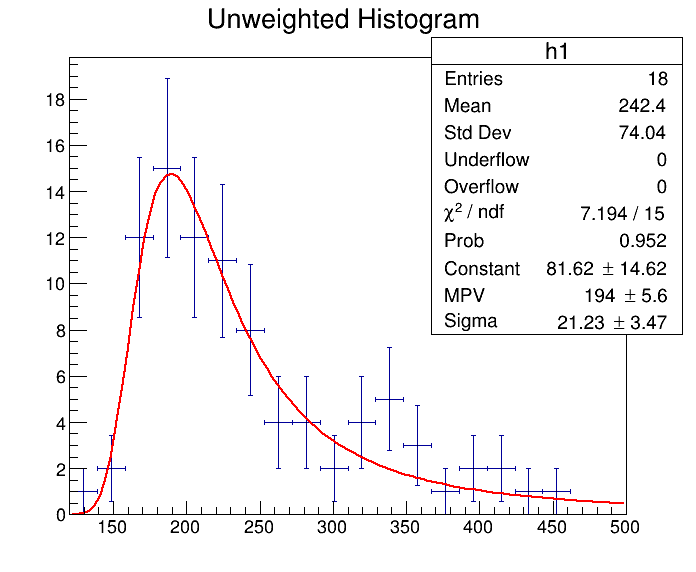

In [10]:
c2->Draw();

In [11]:
   //apply the chi2 test and retrieve the residuals
   Double_t res[n], x[n];
   h1->Chi2Test(h2,"UU P",res);

Chi2 = 4.355140, Prob = 0.999088, NDF = 17, igood = 2


Info in <TH1D::Chi2TestX>: There is a bin in h2 with less than 1 event.



In [12]:
   //Graph for Residuals
   for (Int_t i=0; i<n; i++) x[i]= 4.+i*12./20.+12./40.;
   TGraph *resgr = new TGraph(n,x,res);
   resgr->GetXaxis()->SetRangeUser(4,16);
   resgr->GetYaxis()->SetRangeUser(-3.5,3.5);
   resgr->GetYaxis()->SetTitle("Normalized Residuals");
   resgr->SetMarkerStyle(21);
   resgr->SetMarkerColor(2);
   resgr->SetMarkerSize(.9);
   resgr->SetTitle("Normalized Residuals");

//Quantile-Quantile plot
   TF1 *f = new TF1("f","TMath::Gaus(x,0,1)",-10,10);
   TGraphQQ *qqplot = new TGraphQQ(n,res,f);
   qqplot->SetMarkerStyle(20);
   qqplot->SetMarkerColor(2);
   qqplot->SetMarkerSize(.9);
   qqplot->SetTitle("Q-Q plot of Normalized Residuals");

   //create Canvas
   TCanvas *c1 = new TCanvas("c1","Chistat Plot",10,10,700,600);
   c1->Divide(2,2);

In [13]:
   // Draw Histogramms and Graphs
   c1->cd(1);
   h1->SetMarkerColor(4);
   h1->SetMarkerStyle(20);

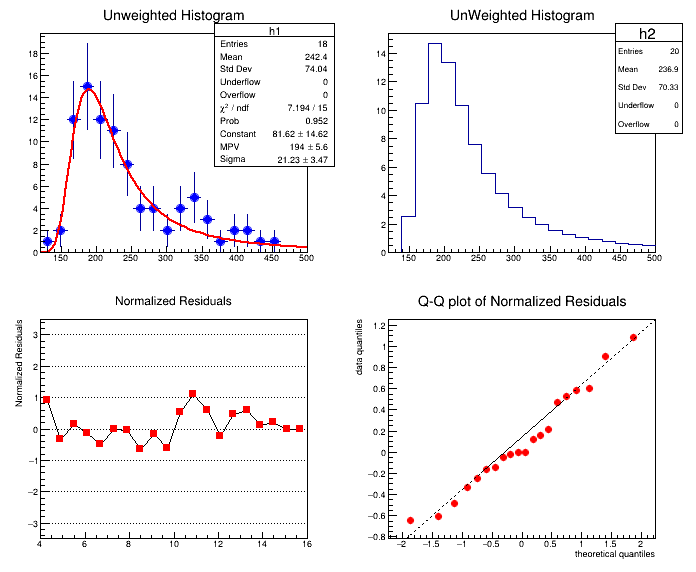

In [14]:
   h1->Draw("E");
 
   c1->cd(2);
   h2->Draw("");
   h2->SetMarkerColor(4);
   h2->SetMarkerStyle(20);
 
   c1->cd(3);
   gPad->SetGridy();
   resgr->Draw("APL");
 
   c1->cd(4);
   qqplot->Draw("AP");
 
   c1->cd(0);
 
   c1->Update();
   c1->Draw();
//return c1;